# Executive Summary

This report aims to create a model to predict whether a patient has diabetes. The dataset which is collected for this report has some features which are important to predict the disease. These features are glucose level, blood pressure, skin thickness, age, weight, insulin and a target variable, which is the diabetes result. The main purpose of this report is to assist medical practitioners, so they can make better decisions about patient diagnoses and treatment options. At the moment, there are a high number of citizens in United States who are not aware of having diabetes. The undiagnosed diabetes may result in an adverse impact of patient’s health condition such as brain malfunctioning in the future. Detecting these patients early by using the machine learning will aid doctors in planning and providing care, which ultimately leads to a better outcome.

The dataset will be processed in two different machine learning algorithms; decision tree and neural network. Hyperparameters will be tuned for both of models to effectively train the model. The performance of both models will be compared to derive to the best model. Neural network model appears to be a better model compare to decision tree model from the analysis.

Despite of high accuracy of the model, some issues may arise from the analysis made in this report. The size of dataset is very small and does not have all features to predict the disease. Furthermore, the way the third-party data is collected is unknown and may affect data validity. The models used in the report may have bias from the hyperparameters being tuned. Additionally, the interpretation neural network is challenging and leads to a concept of black box. It is not known how the model derives to its result. In order to overcome this issue, explainable AI using LIME library is used to understand how the neural network model make prediction.

This report recommends medical practitioners to further analyse the result of neural network model. They should not rely entirely to the model for making predictions. It is suggested for the explainable AI to be supplemented when doctors make decision. Furthermore, the probability distribution of the predicted classes should be considered for doctors to confidently make the final decision.

Further analysis is located in the last section of this report.


# Key Question and Problem Space


This report will predict the patients who have diabetes based on their blood test results and weight. The data is collected from [UCI Machine Learning](https://www.kaggle.com/uciml/pima-indians-diabetes-database). The dataset contains the patients’ historical health information such as their glucose level, blood pressure, skin thickness, age, weight, insulin and a target variable which is the diabetes result. From the features in the dataset, this report will use classification machine learning algorithm to evaluate the condition of the patients and derive to the predicted result. The problem space that this report aims to answer is:

1.	Is there some way to determine the patients which have diabetes by looking at patients’ general health data?

The purpose of this report is to assist the medical doctors to analyse whether a person has diabetes. Diabetes is a condition when the blood cannot regulate the glucose and leads to high blood glucose in the body. [United States Centres for Disease Control and Prevention](https://www.cdc.gov/diabetes/pdfs/data/statistics/national-diabetes-statistics-report.pdf) mentioned that 10 percent of US population have diabetes and 7.3 million people are not aware of having the disease. If the disease remained undiagnosed, it will eventually damage the patients’ organ, including brain and heart malfunctioning. The result from the data analysis will assist the medical professionals and doctors to detect the patients with diabetes early. As a result, medical professionals can proceed with the diabetes treatment quickly to those who are positive with diabetes. This will prevent the people from contracting serious disease which arose due to the undiagnosed diabetes in the future.


# Data Preprocessing

In [1]:
# Installing library used for oversampling method
# !pip install imbalanced-learn

In [2]:
import pandas as pd
import numpy as np

#Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

#Data Preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
#Decision Tree visualisation
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

#Analyse Result
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Explainable AI
import lime
from lime import lime_tabular

#Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

#Randomseed
import random as rn
np.random.seed(10)
rn.seed(10)
tf.compat.v1.set_random_seed(10)
session_conf = tf.compat.v1.ConfigProto( intra_op_parallelism_threads=1,
                                          inter_op_parallelism_threads=1 )

Using TensorFlow backend.


In [3]:
#Read file
data=pd.read_csv('diabetes.csv')
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
#Look at general information of the data
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [5]:
#Data which is 0 shows missing values. Glucose, bloodpressure, skinthickness, bmi may have distorted data
missing_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in missing_columns:
    data[column].replace(0, np.NaN, inplace=True)

In [6]:
#Tak a look to dataset column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     763 non-null float64
BloodPressure               733 non-null float64
SkinThickness               541 non-null float64
Insulin                     394 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [7]:
#fill missing values with median, instead of mean to prevent outlier
for column in missing_columns:
    median=data[column].median()
    data[column].fillna(median,inplace=True)

In [8]:
#No more missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [9]:
#Set input and target variables
y = data['Outcome']
X = data.drop(['Outcome'], axis=1)

In [10]:
#Distribution of classes in target variable
data.groupby('Outcome').count()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
Outcome                                                                     
0                500      500            500            500      500  500   
1                268      268            268            268      268  268   

         DiabetesPedigreeFunction  Age  
Outcome                                 
0                             500  500  
1                             268  268

In [11]:
#Use oversampling method to ensure equal proportion of classes
ros = RandomOverSampler(sampling_strategy={1: 500, 0: 500}, random_state=10)
X_res, y_res = ros.fit_resample(X, y)

In [12]:
#Distribution of classes in target variable
Counter(y_res)

Counter({1: 500, 0: 500})

In [13]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
Pregnancies                 1000 non-null int64
Glucose                     1000 non-null float64
BloodPressure               1000 non-null float64
SkinThickness               1000 non-null float64
Insulin                     1000 non-null float64
BMI                         1000 non-null float64
DiabetesPedigreeFunction    1000 non-null float64
Age                         1000 non-null int64
dtypes: float64(6), int64(2)
memory usage: 62.6 KB


The dataset has 1000 instances, in which 500 of them belong to patients with negative diabetes result and another 500 instances belong to patients with positive diabetes result.

# Data Analysis
## Decision Tree

In [14]:
#Convert input features to numpy and split the data
X_mat = X_res.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y_res, test_size=0.3, stratify=y_res, random_state=10)

In [15]:
# Simple decision tree training
rs=10
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [16]:
#Print the accuracy
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.8133333333333334


In [17]:
#Print classification report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       150
           1       0.78      0.87      0.82       150

    accuracy                           0.81       300
   macro avg       0.82      0.81      0.81       300
weighted avg       0.82      0.81      0.81       300



In [18]:
# visualize the decision tree and save the decision tree
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("img/diabetes.png") # saved in the following file - will return True if successful

The accuracy and the visualisation of default decision tree without hyperparameter tuning will be used for the analysis at the end of the report.

## Decision Tree with GridSearchCV

This report use GridSearchCV to search the best parameters for tuning decision tree model.

In [19]:
# grid search CV to find best parameters to tune the model
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 16),
          'min_samples_leaf': range(0, 25, 5)[1:]}

cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),return_train_score=True, cv=10)
cv_1.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=10,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [20]:
print(cv_1.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 15}


In [21]:
#Accuracy
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

Train accuracy: 0.8385714285714285
Test accuracy: 0.7533333333333333


In [22]:
# grab feature importances from the model
importances = cv_1.best_estimator_.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

for i in indices:
    print(feature_names[i], ':', importances[i])

Glucose : 0.4694138690088672
BMI : 0.24092997980695113
Age : 0.12287304277967197
BloodPressure : 0.08283588881637777
DiabetesPedigreeFunction : 0.049591014235148695
Pregnancies : 0.02135644169606756
Insulin : 0.01299976365691569
SkinThickness : 0.0


Decision tree model gives a higher importance on Glucose, BMI and Age. This is an indication for medical practitioners to focus on these patient's feature to make the prediction.

In [23]:
# visualize
dotfile = StringIO()
export_graphviz(cv_1.best_estimator_, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("img/diabetes_cv.png") # saved in the following file - will return True if successful

### Decision Tree - True Negative

In [24]:
patient_index=1

patient_features=X_test[patient_index]
actual_result=y_test.tolist()[patient_index]
predicted_result=cv_1.best_estimator_.predict([X_test[patient_index]])

print("Patient id: %d \t Predicted: %s \t True Diagnosis: %s\n" 
      %(patient_index, "Diabetes" if predicted_result else "No Diabetes", "Diabetes" if actual_result else "No Diabetes"))

print('\nPatient features: ' )
for x,y in enumerate(feature_names):
    print(feature_names[x],patient_features[x])

Patient id: 1 	 Predicted: No Diabetes 	 True Diagnosis: No Diabetes


Patient features: 
Pregnancies 0.0
Glucose 124.0
BloodPressure 56.0
SkinThickness 13.0
Insulin 105.0
BMI 21.8
DiabetesPedigreeFunction 0.452
Age 21.0


### Decision Tree - False Negative

In [25]:
patient_index=90

patient_features=X_test[patient_index]
actual_result=y_test.tolist()[patient_index]
predicted_result=cv_1.best_estimator_.predict([X_test[patient_index]])

print("Patient id: %d \t Predicted: %s \t True Diagnosis: %s\n" 
      %(patient_index, "Diabetes" if predicted_result else "No Diabetes", "Diabetes" if actual_result else "No Diabetes"))

print('\nPatient features: ' )
for x,y in enumerate(feature_names):
    print(feature_names[x],patient_features[x])

Patient id: 90 	 Predicted: No Diabetes 	 True Diagnosis: Diabetes


Patient features: 
Pregnancies 5.0
Glucose 115.0
BloodPressure 76.0
SkinThickness 29.0
Insulin 125.0
BMI 31.2
DiabetesPedigreeFunction 0.34299999999999997
Age 44.0


## ROC-AUC for Decision Tree

ROC-AUC will give a better understanding of how well the model of performing. Instead of relying on the accuracy of the model, ROC-AUC take into account both true positive rate and false positive rate. The higher the ROC index shows the model has a better performance.

In [26]:
#ROC index
y_pred_proba_dt = model.predict_proba(X_test)
y_pred_proba_dt_cv = cv_1.best_estimator_.predict_proba(X_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index on test for DT_default:", roc_index_dt)
print("ROC index on test for DT_optimal:", roc_index_dt_cv)

ROC index on test for DT_default: 0.8133333333333332
ROC index on test for DT_optimal: 0.8391555555555555


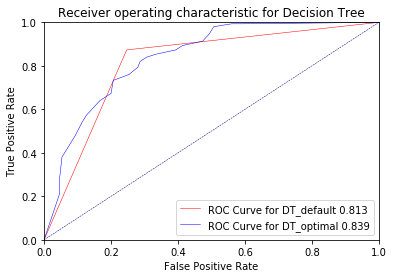

In [27]:
#Plot ROC-AUC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Decision Tree')
plt.legend(loc="lower right")
plt.savefig('img/dt_roc')
plt.show()

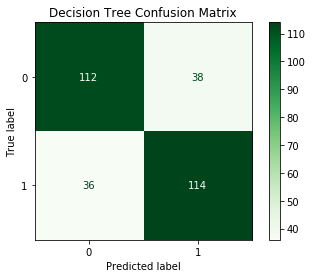

In [28]:
#Plot confusion matrix for gridsearch model
plot_confusion_matrix(cv_1.best_estimator_, X_test, y_test,cmap=cm.Greens,values_format = '')
plt.title('Decision Tree Confusion Matrix')
plt.savefig('img/dt_confusionmatrix')
plt.show()

# Neural Network

In [29]:
#Normalising the data for input features
scaler = MinMaxScaler()

print("Before scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))
    
X_train = scaler.fit_transform(X_train)
print("After scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))
    
X_test = scaler.transform(X_test)

Before scaling
-------------
Variable #0: min 0.0, max 15.0, mean 4.05 and std dev 3.39
Variable #1: min 44.0, max 199.0, mean 127.67 and std dev 31.40
Variable #2: min 24.0, max 122.0, mean 73.15 and std dev 12.65
Variable #3: min 7.0, max 99.0, mean 29.38 and std dev 8.62
Variable #4: min 14.0, max 846.0, mean 147.92 and std dev 89.81
After scaling
-------------
Variable #0: min 0.0, max 1.0, mean 0.27 and std dev 0.23
Variable #1: min 0.0, max 1.0, mean 0.54 and std dev 0.20
Variable #2: min 0.0, max 0.9999999999999998, mean 0.50 and std dev 0.13
Variable #3: min 0.0, max 0.9999999999999999, mean 0.24 and std dev 0.09
Variable #4: min 0.0, max 1.0, mean 0.16 and std dev 0.11


In [30]:
# One hot encoding for target variable
enc = OneHotEncoder()
y_train = enc.fit_transform(y_train[:, np.newaxis]).toarray()
y_test= enc.fit_transform(y_test[:, np.newaxis]).toarray()

In [31]:
#Split the test data for validation in NN
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=10)

In [32]:
# function to create neural network
def create_model(input_dim, output_dim, nodes, hidden_layers=1, loss_func='categorical_crossentropy', optim='nadam', metrics=['accuracy'], name='model'):
    
    model = Sequential(name=name)

    # adding a sequence of layers according to the fucntion's input params
    model.add( Dense(nodes, input_dim=input_dim, activation='relu'))  # input layer
    for i in range(hidden_layers):                                    # hidden layers
      model.add(Dense(nodes, activation='relu'))  
    model.add(Dense(output_dim, activation='softmax'))                # output layer

    # Compile model
    if( optim == "nadam" ):
      optim = keras.optimizers.Nadam(lr=0.0001, beta_1=0.9, beta_2=0.999)
  
    model.compile(loss=loss_func, 
                  optimizer=optim, 
                  metrics=metrics)
    return model

In [33]:
# SERIALIZE_MODEL_HISTORY ------------------------------------------
def serialize_model_history(  model_hist, model_name, path ):
  file = open(path + model_name + "_hist.csv", "w")
  w = csv.writer( file )
  
  for key, val in model_hist.history.items():
    w.writerow([key, val])
  file.close()
  print("Model history saved to disk") 

# LOAD_MODEL_HISTORY ------------------------------------------
def load_model_history( model_name, path):

  model_hist_loaded = {}
  values = []

  # load dictionary
  r = open( path + model_name + "_hist.csv", "r").read()
  for line in r.split("\n"):
    if(len(line) == 0):
      continue
  
    metric = line.split(",\"[")[0]                                    # extract metrics
    values_str = line.split(",\"[")[1].replace("]\"","").split(", ")  # extract validation values
    values = [float(val_str) for val_str in values_str]
    model_hist_loaded.update( {metric : values} )
  return model_hist_loaded

In [34]:
#General detail of the features and classes
features=list(X.columns)
n_features=len(features)
n_samples = X.shape[0]
n_classes = len(data['Outcome'].unique())
print('''There are %i number of features, %i training instances with %i target classes.'''%(n_features,n_samples,n_classes))

There are 8 number of features, 768 training instances with 2 target classes.


In [35]:
#Create models for different nodes and hidden layers
MAX_NODES = 9
MAX_HLAYERS = 4
DEBUG = False
models = []
metrics = ['accuracy']

# Define different models with different number of hidden layers and different number of neurons
for neuron in range(2, MAX_NODES+1,3):
  print("-----------------------------------")
  for hidden_layer in range(1, MAX_HLAYERS+1):
    model_name = "model_h" + str(hidden_layer) + "_N"+str(neuron)
    model = create_model(n_features, n_classes, neuron, hidden_layer, name=model_name, metrics = metrics)
    
    print("Generating model: " + model_name)
    models.append( model )

# plot general information for each model
if( DEBUG ):  
  for model in models:
      model.summary()

-----------------------------------
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Generating model: model_h1_N2
Generating model: model_h2_N2
Generating model: model_h3_N2
Generating model: model_h4_N2
-----------------------------------
Generating model: model_h1_N5
Generating model: model_h2_N5
Generating model: model_h3_N5
Generating model: model_h4_N5
-----------------------------------
Generating model: model_h1_N8
Generating model: model_h2_N8
Generating model: model_h3_N8
Generating model: model_h4_N8


In [36]:
# Setting number of iterations and batch size
EPOCHS = 150
BATCH_SIZE = 1

HISTORY_DICT = {}

In [35]:
# only set true if you want to re-run the grid search process
FLAG = False 


if FLAG:
  patience = 10 # how many iterations to be considered a convergence

  # stop training when convergence is achieved after 10 iterations
  early_stop = EarlyStopping(monitor='val_loss', patience=patience, verbose=1, mode='min')
  # save the model after every epoch
  callbacks_list = [early_stop]

  # grid search over each model
  for model in models:
    print('MODEL NAME:', model.name)
    history_callback = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                                 verbose=0, validation_data=(X_validation, y_validation), callbacks=callbacks_list)
    
    score_test = model.evaluate( X_test, y_test, verbose=0 )
    score_train = model.evaluate( X_train, y_train  )
  
    print('Test loss:     ', format(score_test[0], '.4f'), '\tTrain loss: ', format(score_train[0], '.4f') )
    print('Test accuracy: ', format(score_test[1], '.4f'), '\tTrain accu: ', format(score_train[1], '.4f') )
    print('Abs accuracy:  ', format( np.abs( score_test[1] - score_train[1] ), '.4f'))
    print('Abs loss:      ', format( np.abs( score_test[0] - score_train[0] ), '.4f'))
    print('\n###########################################################\n')

    HISTORY_DICT[model.name] = [history_callback, model]


MODEL NAME: model_h1_N2
Epoch 00014: early stopping
700/700 [==============================] - 0s 97us/sample - loss: 0.6931 - acc: 0.5000
Test loss:      0.6931 	Train loss:  0.6931
Test accuracy:  0.5133 	Train accu:  0.5000
Abs accuracy:   0.0133
Abs loss:       0.0000

###########################################################

MODEL NAME: model_h2_N2
Epoch 00029: early stopping
700/700 [==============================] - 0s 74us/sample - loss: 0.6931 - acc: 0.5000
Test loss:      0.6931 	Train loss:  0.6931
Test accuracy:  0.5133 	Train accu:  0.5000
Abs accuracy:   0.0133
Abs loss:       0.0000

###########################################################

MODEL NAME: model_h3_N2
Epoch 00022: early stopping
700/700 [==============================] - 0s 102us/sample - loss: 0.6931 - acc: 0.5000
Test loss:      0.6931 	Train loss:  0.6931
Test accuracy:  0.5133 	Train accu:  0.5000
Abs accuracy:   0.0133
Abs loss:       0.0000

#######################################################

In [37]:
#Uncomment it if Flag is set to TRUE;
# HISTORY_DICT

In [38]:
#Uncomment it if Flag is set to TRUE; BEST MODEL
# best_model_name = "model_h1_N5"

In [39]:
#Uncomment it if Flag is set to TRUE;
# HISTORY_DICT['model_h1_N5']

In [40]:
#Uncomment it if Flag is set to TRUE;
#best_model = HISTORY_DICT[best_model_name]

# serialize best model training history to CSV
#serialize_model_history( best_model[0], best_model_name, "" )

In [41]:
#Uncomment it if Flag is set to TRUE; Save the model, creates a HDF5 file 'best_nnmodel'
# best_model[1].save('best_nnmodel')  

In [42]:
# load a good model and training history
best_model_name = "model_h1_N5"
best_nn=load_model('best_nnmodel')
best_model_hist_loaded = load_model_history( best_model_name, "")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [43]:
#Print accuracy for both training and test samples
_, train_acc=best_nn.evaluate(X_train,y_train)
_, test_acc=best_nn.evaluate(X_test,y_test)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

150/150 [==============================] - 0s 407us/sample - loss: 0.4835 - acc: 0.7733
Train: 0.784, Test: 0.773


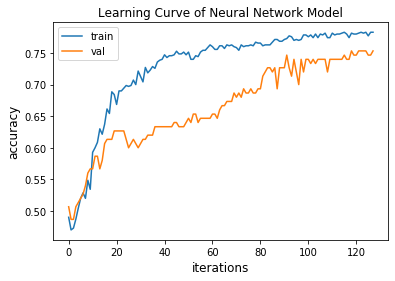

In [44]:
# plot training history
plt.plot(best_model_hist_loaded['acc'], label='train')
plt.plot(best_model_hist_loaded['val_acc'], label='val')
plt.ylabel('accuracy', fontsize=12)
plt.xlabel('iterations', fontsize=12)
plt.title('Learning Curve of Neural Network Model')
plt.legend()
plt.savefig('img/nn_learning')
plt.show()

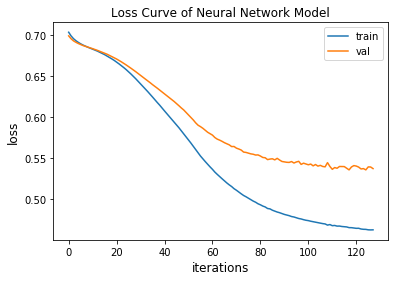

In [45]:
#Plot the loss curve
plt.plot(best_model_hist_loaded['loss'], label='train')
plt.plot(best_model_hist_loaded['val_loss'], label='val')
plt.ylabel('loss', fontsize=12)
plt.xlabel('iterations', fontsize=12)
plt.title('Loss Curve of Neural Network Model')
plt.legend()
plt.savefig('img/nn_loss')
plt.show()

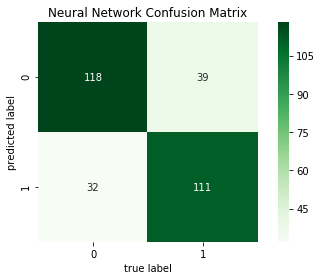

In [46]:
#Plot confusion matrix
predict_test=enc.inverse_transform(best_nn.predict( X_test ))
predict_val=enc.inverse_transform(best_nn.predict( X_validation ))
groundtruth_test=enc.inverse_transform( y_test )
groundtruth_val=enc.inverse_transform( y_validation)

predictions = np.concatenate((predict_test, predict_val))
groundtruth = np.concatenate((groundtruth_test, groundtruth_val))

mat = confusion_matrix(groundtruth, predictions)
ax = plt.axes()
sns.heatmap(mat.T, square=True, cbar=True, xticklabels=[0,1],
            yticklabels=[0,1], annot=True, cmap=cm.Greens,ax = ax,fmt='g')

ax.set_xlabel('true label')
ax.set_ylabel('predicted label')
ax.set_title('Neural Network Confusion Matrix')
plt.tight_layout()
plt.savefig('img/nn_confusionmatrix')
plt.show()

In [47]:
#ROC Index for Neural Network Best Model
y_pred_proba_NN= best_nn.predict_proba(X_test)

roc_index_NN = roc_auc_score(enc.inverse_transform(y_test)[:,0], y_pred_proba_NN[:, 1])

print("ROC index on test for Neural Network:", roc_index_NN)

ROC index on test for Neural Network: 0.8560754314178971


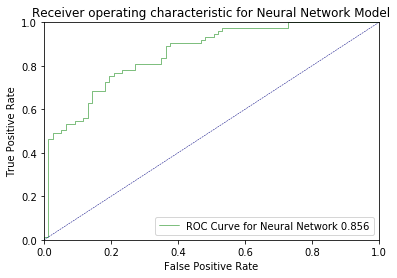

In [48]:
#Plot ROC-AUC Curve
fpr_nn, tpr_nn, thresholds_nn = roc_curve(enc.inverse_transform(y_test)[:,0], y_pred_proba_NN[:, 1])

plt.plot(fpr_nn, tpr_nn, label='ROC Curve for Neural Network {:.3f}'.format(roc_index_NN), color='green', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Neural Network Model')
plt.legend(loc="lower right")
plt.savefig('img/nn_roc')
plt.show()

# Explainable AI for Neural Network Model

In [49]:
len(feature_names)

8

In [50]:
feature_names=list(data.columns)
feature_names.remove('Outcome')

In [51]:
#Using lime tabular library
explainer = lime_tabular.LimeTabularExplainer(X_train, feature_names= feature_names,
                                                  class_names=["No Diabetes", "Diabetes"], verbose=False, mode='classification')

## True Negative

In [52]:
patient_indx = 90

patients_feat = (X_test[patient_indx,:])
patients_true_pred = enc.inverse_transform(np.expand_dims(y_test[patient_indx,:], 0))[0][0]

# prediction
pred = best_nn.predict(np.expand_dims(patients_feat, 0))
pred = enc.inverse_transform( pred )[0][0]

print("Patient id: %d \t Predicted: %s \t True Diagnosis: %s\n" 
      %(patient_indx, "Diabetes" if pred else "No Diabetes", "Diabetes" if patients_true_pred else "No Diabetes"))

Patient id: 90 	 Predicted: No Diabetes 	 True Diagnosis: No Diabetes



In [53]:
# explain instance
exp = explainer.explain_instance(patients_feat, best_nn.predict_proba,num_features=20 )
exp.show_in_notebook(show_table=True )
exp.as_list()

[('Glucose <= 0.39', -0.30010286932445224),
 ('DiabetesPedigreeFunction > 0.25', 0.17908674982129624),
 ('BMI <= 0.21', -0.167954972461404),
 ('Age <= 0.08', -0.12868650342995394),
 ('Pregnancies <= 0.07', -0.10210031392611822),
 ('Insulin <= 0.13', -0.043445393286729375),
 ('0.43 < BloodPressure <= 0.49', 0.02911135922802613),
 ('SkinThickness <= 0.21', -0.02152275617073542)]

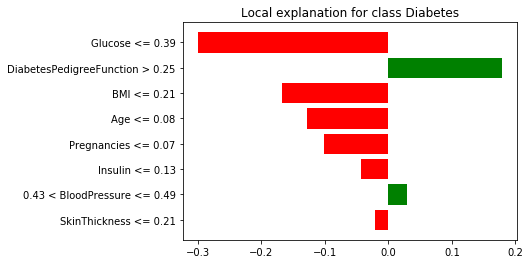

In [54]:
explanation_plot = exp.as_pyplot_figure()
plt.savefig('img/exp_tn')

## True Positive

In [55]:
patient_indx = 35

patients_feat = (X_test[patient_indx,:])
patients_true_pred = enc.inverse_transform(np.expand_dims(y_test[patient_indx,:], 0))[0][0]

# prediction
pred = best_nn.predict(np.expand_dims(patients_feat, 0))
pred = enc.inverse_transform( pred )[0][0]

print("Patient id: %d \t Predicted: %s \t True Diagnosis: %s\n" 
      %(patient_indx, "Diabetes" if pred else "No Diabetes", "Diabetes" if patients_true_pred else "No Diabetes"))

Patient id: 35 	 Predicted: Diabetes 	 True Diagnosis: Diabetes



In [56]:
# explain instance
exp = explainer.explain_instance(patients_feat, best_nn.predict_proba,num_features=20 )
exp.show_in_notebook(show_table=True )
exp.as_list()

[('BMI > 0.38', 0.1836851564274011),
 ('Pregnancies <= 0.07', -0.10045039107381687),
 ('0.52 < Glucose <= 0.69', 0.08745962190591336),
 ('BloodPressure > 0.57', -0.08163525689853925),
 ('0.07 < DiabetesPedigreeFunction <= 0.13', -0.059954722668112644),
 ('SkinThickness > 0.28', 0.029853818754819454),
 ('Insulin <= 0.13', -0.028546556618405848),
 ('0.08 < Age <= 0.20', -0.005017632964037399)]

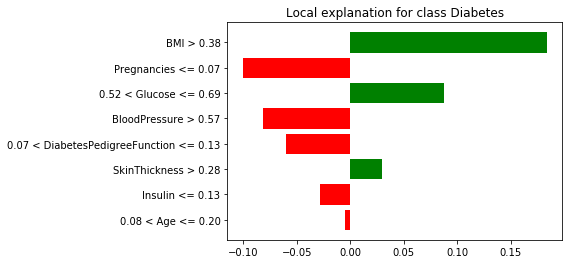

In [57]:
explanation_plot = exp.as_pyplot_figure()
plt.savefig('img/exp_tp')

## False Positive

In [58]:
patient_indx = 49

patients_feat = (X_test[patient_indx,:])
patients_true_pred = enc.inverse_transform(np.expand_dims(y_test[patient_indx,:], 0))[0][0]

# prediction
pred = best_nn.predict(np.expand_dims(patients_feat, 0))
pred = enc.inverse_transform( pred )[0][0]

print("Patient id: %d \t Predicted: %s \t True Diagnosis: %s\n" 
      %(patient_indx, "Diabetes" if pred else "No Diabetes", "Diabetes" if patients_true_pred else "No Diabetes"))

Patient id: 49 	 Predicted: Diabetes 	 True Diagnosis: No Diabetes



In [59]:
# explain instance
exp = explainer.explain_instance(patients_feat, best_nn.predict_proba,num_features=20 )
exp.show_in_notebook(show_table=True )
exp.as_list()

[('DiabetesPedigreeFunction > 0.25', 0.17313441150013062),
 ('BMI <= 0.21', -0.16673179470582236),
 ('Pregnancies > 0.47', 0.13756174320704714),
 ('0.39 < Glucose <= 0.52', -0.09096254008408475),
 ('Age > 0.40', 0.06685817026823673),
 ('Insulin <= 0.13', -0.030426482851707175),
 ('SkinThickness <= 0.21', -0.029740374037791884),
 ('0.43 < BloodPressure <= 0.49', 0.001784087912940691)]

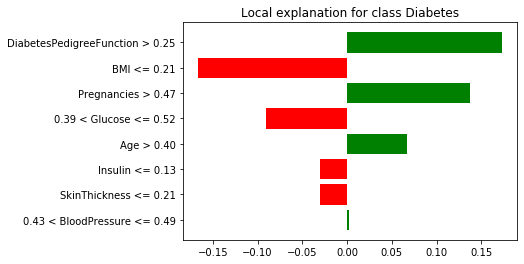

In [60]:
explanation_plot = exp.as_pyplot_figure()
plt.savefig('img/exp_fp')

## False Negative

In [61]:
patient_indx = 95

patients_feat = (X_test[patient_indx,:])
patients_true_pred = enc.inverse_transform(np.expand_dims(y_test[patient_indx,:], 0))[0][0]

# prediction
pred = best_nn.predict(np.expand_dims(patients_feat, 0))
pred = enc.inverse_transform( pred )[0][0]

print("Patient id: %d \t Predicted: %s \t True Diagnosis: %s\n" 
      %(patient_indx, "Diabetes" if pred else "No Diabetes", "Diabetes" if patients_true_pred else "No Diabetes"))

Patient id: 95 	 Predicted: No Diabetes 	 True Diagnosis: Diabetes



In [62]:
# explain instance
exp = explainer.explain_instance(patients_feat, best_nn.predict_proba,num_features=20 )
exp.show_in_notebook(show_table=True )
exp.as_list()

[('0.39 < Glucose <= 0.52', -0.09039850880565437),
 ('Age > 0.40', 0.07379009192690303),
 ('0.07 < DiabetesPedigreeFunction <= 0.13', -0.07194181875732356),
 ('BloodPressure <= 0.43', 0.06951894034298069),
 ('0.21 < BMI <= 0.30', -0.04867999128108692),
 ('0.20 < Pregnancies <= 0.47', 0.045614078294206335),
 ('Insulin <= 0.13', -0.0371152832018323),
 ('0.21 < SkinThickness <= 0.24', 0.0026467940848363637)]

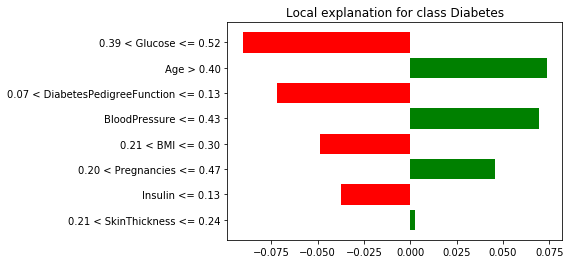

In [63]:
explanation_plot = exp.as_pyplot_figure()
plt.savefig('img/exp_fn')

**--------------------------------------------------------------------End of Jupyter Notebook Code----------------------------------------------------------**

# Data Analytics Process

The data analytics starts with preprocessing the dataset. Some of columns in the dataset such as glucose, blood pressure, skin thickness, insulin and BMI appeared to have a value of zero. This shows that the data was inconsistent and required to be cleaned to create an efficient model in the analysis. The rows with missing values are replaced with NaN values. Then, the missing values will be filled with the median figure of the column. Using median to fill the missing values will prevent the impact of outlier in the dataset. All columns are in the correct format, for example, age and number of pregnancies are in integer.

There is class imbalance in the dataset. The number of patients with diabetes were 268 samples, while the number of patients without diabetes disease were 268 samples. A classifier needs to have the similar number of instances for each class. Otherwise, it will be biased to predict patients as negative diabetes. This report used oversampling method to adjust the class distribution. The reason of using oversampling over undersampling is because a good neural network model requires more data for training (Chai et al., 2019).

This report uses classification machine learning algorithm to make prediction. In order to find the best models, the performance of different models such as decision tree and neural network are being compared. Hyperparameters are tuned for both models to avoid overfitting and increase the accuracy of the models. Some hyperparameters in the decision trees which are tuned are criterion (gini or entropy), the tree depth, and minimum leaf samples. The best parameters from the GridSearchCV will be used and fitted to the training dataset.

The testing dataset is split into validation dataset to ensure that the neural network model is not biased to the test dataset. Some parameters in neural network which are tuned are the number of hidden layers and nodes. The neural network is trained with relu and softmax activation function. ReLu is an activation function with a threshold set to 0. ReLu is fast and simple to implement compared to other activation functions. Softmax function will be used for the output layer to produce the results. Softmax will give result in probability for both positive and negative diabetes. The number of hidden layers and nodes which give a better accuracy for both validation and training dataset will be chosen to make the prediction.

Confusion matrix, precision and recall will be utilised to find how accurately the model make predictions. ROC AUC will be used to compare both decision tree and neural network in selecting the optimal model. Some other visualisations, such as the learning curve will be plotted to understand how neural network model learns. Furthermore, decision tree will be plotted to understand how the decision tree make the prediction.

All of the steps mentioned above will assist in choosing a better model to predict whether a patient has diabetes which will help the medical professionals.


# Analysis of Decision Tree Model

There are two decision tree models built in the report. The decision tree with the best parameter in GridSearchCV resulted in 83.86% and 75.33% training and test accuracy respectively. Meanwhile, the decision tree without hyperparameter tuning resulted in 100% and 81.3% training and test accuracy. Although the accuracy result of the model with hyperparameter tuning is lower than the default decision tree, its roc index is higher. Accuracy is not an accurate method to evaluate the models. When the model is biased to one class, accuracy for both training and test data may be high. ROC and AUC take into account the error in the prediction by using true positive rate and false positive rate. The higher the ROC index shows a better the model.

There are some features which are more important in predicting the disease. Medical doctors need to put more attention into Glucose, BMI and age. This decision tree model found that skin thickness has no impact to predict diabetes. 

<img src="img/cvdt_pt1_feature.png" style="width: 500px;">

<img src="img/cvdt_pt1.png" style="width: 500px;">


From the decision tree diagram above, the model has created decision rules. For example, the model has correctly predicted patient index 1 to have no diabetes.
-	Based on the diagram, the patient has a glucose level which is higher than 123.5, hence, it returns false. 
-	Then, it checks whether glucose is lesser than 154.5 and returns true. 
-	It continues to check if the BMI is lower than 27.5, and it returns true.
-	The last node based on the patient feature shows that the patient has no diabetes, as the last node has more samples which is non-diabetic (23 samples).
By using decision tree model, the medical doctors will be able to understand how the model predicts. It is easier to understand why the model make a correct or wrong prediction for the patient with decision tree model.

Decision tree model is easy to interpret and often referred as a white box model. All medical doctors and stakeholders can easily understand why the model makes the prediction. Another advantage of decision tree is medical workers can analyse the patient feature with decision tree diagram manually.


# Analysis of Neural Network Model

After searching the best number of neurons and hidden layers, the best model which will be used has 1 hidden layer with 5 neurons. The optimiser that the model used is Nadam. Nadam is an extension of gradient descent algorithm which initially assigns a random weight to compute the output. Then, the loss will be calculated, and the weight is altered in the next iteration to minimise the loss. The model with 1 hidden layer and 5 neurons produced the lowest loss compare to others. 

<img src="img/nn_learning.png" style="width: 400px;">

<img src="img/nn_loss.png" style="width: 400px;">


The neural network model has an accuracy of 78% and 77% for the training and test data. The result shows that there is a slight overfitting to the training data. The accuracy and loss curve above show that the neural network has been trained after 120 iterations. However, the model performs better to the training data in comparison to the validation data. The loss for training dataset is lower than the validation dataset.

# Choosing a Better Model

In order to choose a better model, Area Under Curve and ROC index are used. The model which has a higher ROC index are preferable as it measures the performance of the model.


<img src="img/dt_roc.png" style="width: 400px;">

<img src="img/nn_roc.png" style="width: 400px;">

<img src="img/dt_confusionmatrix.png" style="width: 400px;">

<img src="img/nn_confusionmatrix.png" style="width: 400px;">


From the figures above, neural network outperforms the decision tree model based on its ROC index. From the confusion matrix of decision tree model, it misclassified a total of 74 instances in the test dataset. Neural network misclassified a total of 71 instances from the test and validation dataset. The neural network model is considered as a better model to choose for predicting patient with diabetes.


# Potential Issues in the Analysis	

Although the models seem to have a good accuracy, some problems may arise from using the models above. If the medical practitioners believe the model which misdiagnose a patient with positive diabetes, this may cause a serious issue. Medical practitioners may prescribe diabetes medicine to the patient who does not have the disease. Consequently, it may deteriorate the patient’s health condition. On the other hand, if the medical practitioners believe the model which misdiagnosed a patient to be negative diabetes, the patient will not receive an appropriate treatment for the disease. He/she may end up in having a critical condition. 

High in accuracy number does not mean that the model is trustworthy in detecting the disease. In fact, there may be some bias from the model. The bias emerges from how the data is collected, preprocessed, the machine learning models chosen and the hyperparameter tuning. 

## Data Collection

The data is collected from the third party and how they collected the data is unknown. The dataset may be invalid and not reflecting the correct values. Furthermore, the data is a personal health information of the patients. It is questionable whether the third party has received consent from the patients to use their personal health data for training the model.  

The dataset only has few features such as glucose, insulin, and age. However, some other features such as patients’ family history with diabetes is unknown. This will result in an adverse impact of the model training. Additionally, [US National Library of Medicine](https://ghr.nlm.nih.gov/primer/inheritance/ethnicgroup) mentioned that some diseases are more common in particular ethnic groups. People who share certain versions of genes may be prone to a certain disease. The dataset in this analysis has no information of the patients’ personal background. 



## Data Preprocessing

The dataset has imbalance number of samples in both classes. This report used random over sampling to overcome this issue. However, random over sampling will affect the model as the data being generated is random. The data may not be an actual representation of the features and will adversely affect the training of the model.

Additionally, the number of missing values in some columns are extremely high. For example, the percentage of missing values in insulin column is nearly 50%. The effectiveness of using median to impute the missing values is questionable given the high percentage of missing values in that column.

## Possible Issues from the Model

### Decision Tree Model

The decision tree model shall be checked against its entropy. Some patients have been misclassified by the decision tree due to the high entropy in the node. For example, patient with index 90 is predicted as not having diabetes when the actual diagnosis is positive diabetes.

<img src="img/cvdt_pt90.png" style="width: 400px;">

After evaluating the patient’s feature and the decision tree diagram, the end node for the patient is in the highlighted box above. The node has a high entropy, meaning that the impurity is high. The entropy is high due to the sample size which belongs to class negative diabetes is 8, whereas the positive diabetes is 7. The numbers of instances are very close to each other. Since the size of patients with negative diabetes is higher, the patients are predicted as negative diabetes. However, the uncertainty in this case is very high. The decision tree model cannot confidently make the prediction for this patient.

### Neural Network Model

The hyperparameters which are checked to choose the best neural network model are only hidden layer size and number of nodes. However, there are many other parameters which should be checked to optimise the model. For example, the report only used Nadam for the neural network optimisers. However, some other optimisers such as adam, adagrad are available and not being examined in the report. Moreover, the activation functions that this report used are relu and softmax to train the model quickly. There are different activation functions, such as tanh and sigmoid, to be applied and examined for the neural network.

Another disadvantage of neural network is its difficulty to interpret the result. Neural network is not easy to comprehend in comparison to decision tree. Each of the 8 features are assigned some weight to each node. It is not known which features are given a bigger weight in the neural network model and what the general characteristics are of patients with diabetes. This leads to the concept of black box and explainable AI appearing in data analytics. A concept which researchers question the results of a neural network model and the way the results were derived. This report further examined the individual prediction of the model by using LIME library to find out why our neural network model make the prediction on the individual instances.

<img src="img/exp_fp1.png" style="width: 500px;">

The figure above is the local explanation of a patient which is misdiagnosed as positive diabetes by the neural network model (False Positive). The local explanation shows that the patient has an equal chance for not having the disease or having the disease. However, the neural network model fails to predict the patient. The probability of the patient to have the disease by the model is 53%. Neural network model is not confident to predict the patient instance.

<img src="img/exp_fn1.png" style="width: 500px;">

We took another instance of a patient which is wrongly classified by the model as negative diabetes when in actual he/she has diabetes (False Negative). The probability of this patient is 52% negative and 48% positive. The local explanation shows that the neural network is confuse whether to classify the patient as positive or negative diabetes.

By looking at the prediction made by the neural network model and its local explanation, the neural network fails to predict some patients by their features. Additional attention should be made to each patient feature and how the neural network model makes its prediction.





# Insight

Answering to the key question in finding a way to predict the disease among patients, neural network can be used in making prediction. The neural network model is a better model than decision tree model. However, it is difficult to interpret how the neural network derive to the prediction. From the analysis above, it is recommended to medical workers to further analyse the patients feature, instead of blindly accepting the prediction from the neural network model.

For example, when medical practitioners use neural network model to predict the disease, they must consider the probability of the prediction. If the neural network model has a high probability in predicting the patient to be positive diabetes, then medical worker will have a confidence to proceed with the diabetic treatment. However, if the probability of the model is 50% diabetes and 50% non-diabetes, it suggested that the patient health should be further examined to derive to the final prediction.

This report recommends some additional steps to predict whether a patient has diabetes:
1.	Run the neural network model with the patient’s feature.
2.	Receive the prediction from the neural network model.
3.	Run LIME library to understand the local instances of the patients.
4.	Medical practitioners to receive the prediction and the lime explainer result.

In order to continue using neural network for prediction, medical practitioners are required to understand the result from the lime tabular explainer. Some training on how to interpret the result should be made available. Moreover, there should be additional training to give in-depth insight on the danger of relying solely on neural network model to make prediction. This evaluation should be made for each patient to ensure an accurate prediction.


# Future Studies

-	Future studies may focus on using other classification algorithms to make the prediction. Some datasets may work better for a certain model. This report is only using decision tree and neural network to make the prediction. However, decision tree model can be explored further with boosting (XGBoost) and bagging (Random Forest). Moreover, there are other classification models such as logistic regression which can be used to make the prediction. These models should be compared to find the best model to use. 

-	Changing other hyperparameters in the neural network model will assist in finding the best parameters to minimise the loss and maximise the accuracy of the model.

-	Find and use a reliable dataset to apply the machine learning algorithm. When the dataset has more data available, it leads to a better trained model.


# References

Chai, S., Wong, W., Goh, K., Wang, H., & Wang, Y. (2019). Radial basis function (RBF) neural network: Effect of hidden neuron number, training data size, and input variables on rainfall intensity forecasting. International Journal on Advanced Science, Engineering and Information Technology, 9(6), 1921–1926. https://doi.org/10.18517/ijaseit.9.6.10239